In [1]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import nltk 
nltk.downloader.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

embeddings_dict = {}
with open("glove.840B.300d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = ''.join(values[:-300])
        vector = np.asarray(values[-300:], dtype='float32')        
        embeddings_dict[word] = vector

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Green\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\Green\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


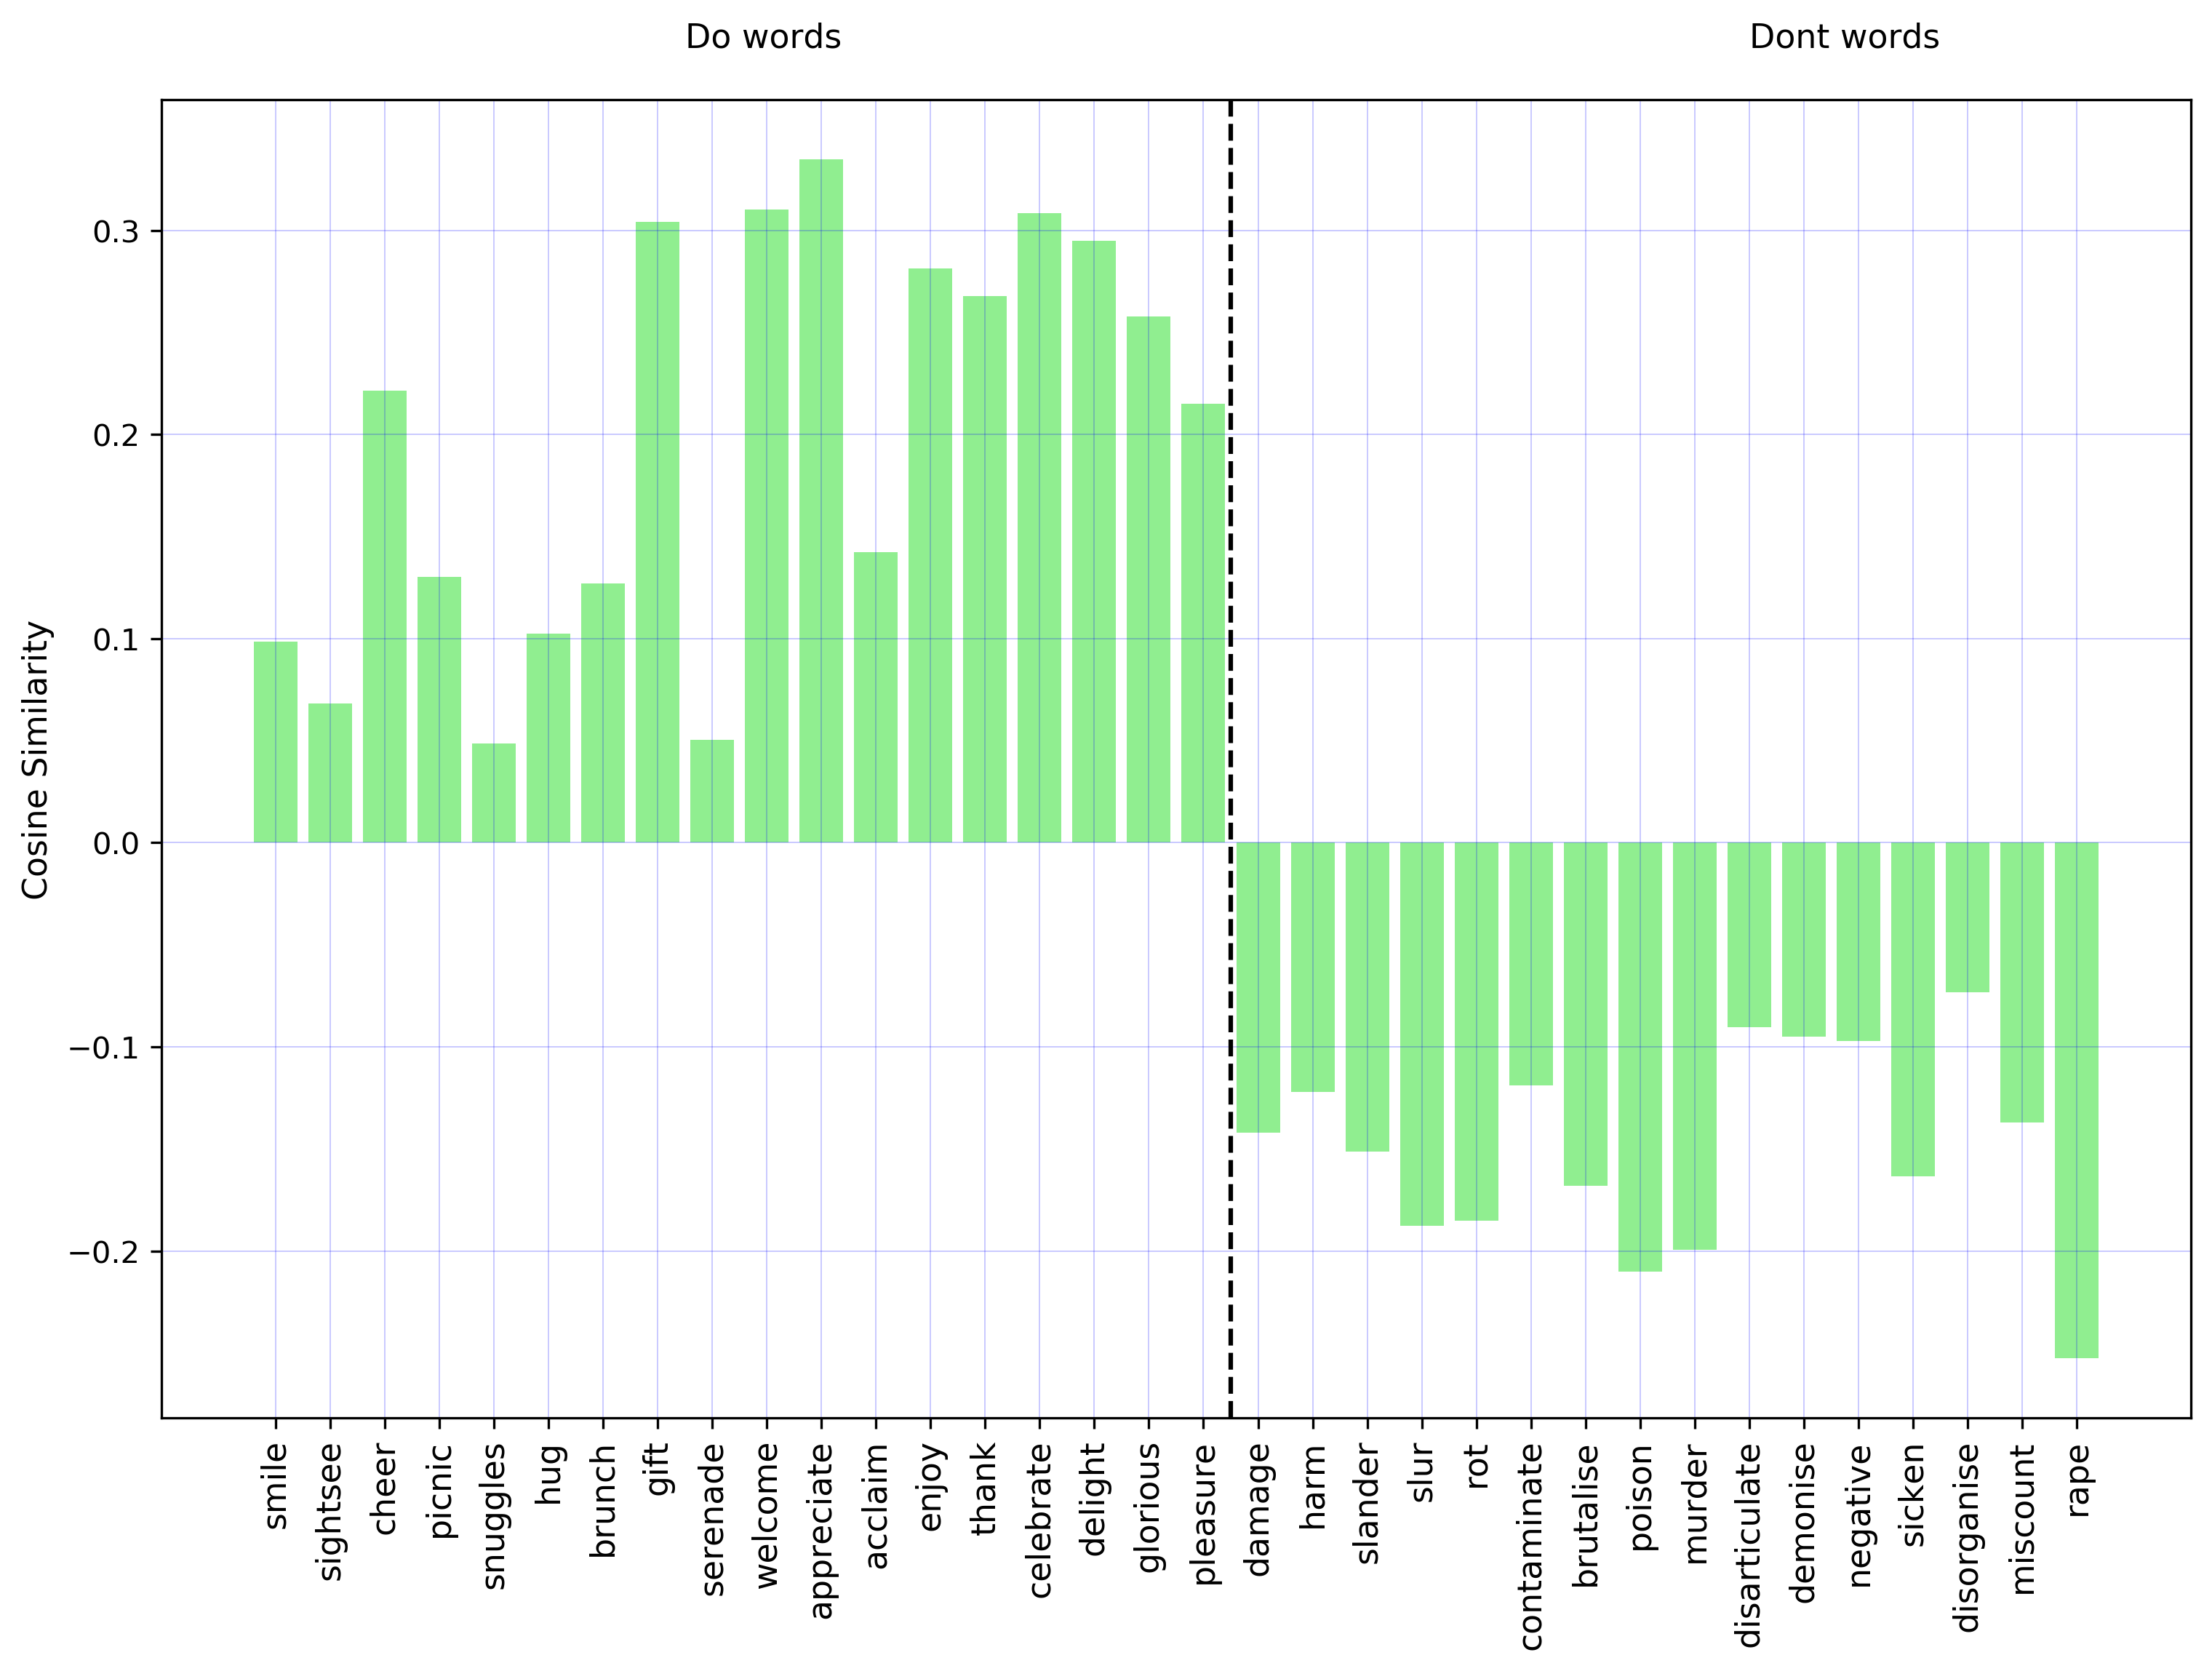

[[1.         0.84939202]
 [0.84939202 1.        ]]


In [14]:
good_verbs = ["smile", "sightsee", "cheer","picnic", "snuggles", "hug", "brunch", "gift", "serenade","welcome",
             "appreciate", "acclaim", "enjoy", "thank", "celebrate", "delight", "glorious", "pleasure"]
bad_verbs = ["damage", "harm", "slander", "slur", "rot", "contaminate", "brutalise", "poison", "murder",
            "disarticulate","demonise","negative","sicken","disorganise","miscount","rape"]

vector1 = embeddings_dict["responsibility"] + embeddings_dict["joy"] + embeddings_dict["beneficial"]  \
+ embeddings_dict["liberty"] - embeddings_dict["prison"] - embeddings_dict["harmful"] - embeddings_dict["pain"]\
- embeddings_dict["irresponsibility"]  



ss=[]
numsp=[]
plot_index=[]
ind = 0
while ind < 18:
#ind = 0
    good = good_verbs[ind]
    vector2 = embeddings_dict[good]
    cosine_similarity = 1 - spatial.distance.cosine(vector1, vector2)
    compound=sid.polarity_scores(good)['compound']
    ss.append(compound)     
    ind = ind + 1
    numsp.append(cosine_similarity)
    plot_index.append(good)



ind2 = 0
while ind2 < 16:
    bad = bad_verbs[ind2]
    vector2 = embeddings_dict[bad]
    cosine_similarity = 1 - spatial.distance.cosine(vector1, vector2)
    compound=sid.polarity_scores(bad)['compound']
    ss.append(compound)
    ind2= ind2 + 1
    numsp.append(cosine_similarity)
    plot_index.append(bad)
    

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["savefig.facecolor"] = 'black'


plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.axvline(x=17.5, ls='--', color='black')
plt.ylabel('Cosine Similarity', fontsize=11)

#plt.title('Using a Fully Dimensioned Fairness Vector with Verbs')
y_pos = range(len(plot_index))
plt.bar(y_pos, numsp, color='lightgreen')
plt.xticks(y_pos, plot_index, rotation=90, fontsize=11)
plt.text(7.5, 0.39, "Do words",fontsize=11)
plt.text(27, 0.39, "Dont words",fontsize=11)
plt.show()

print(np.corrcoef(ss, numsp))


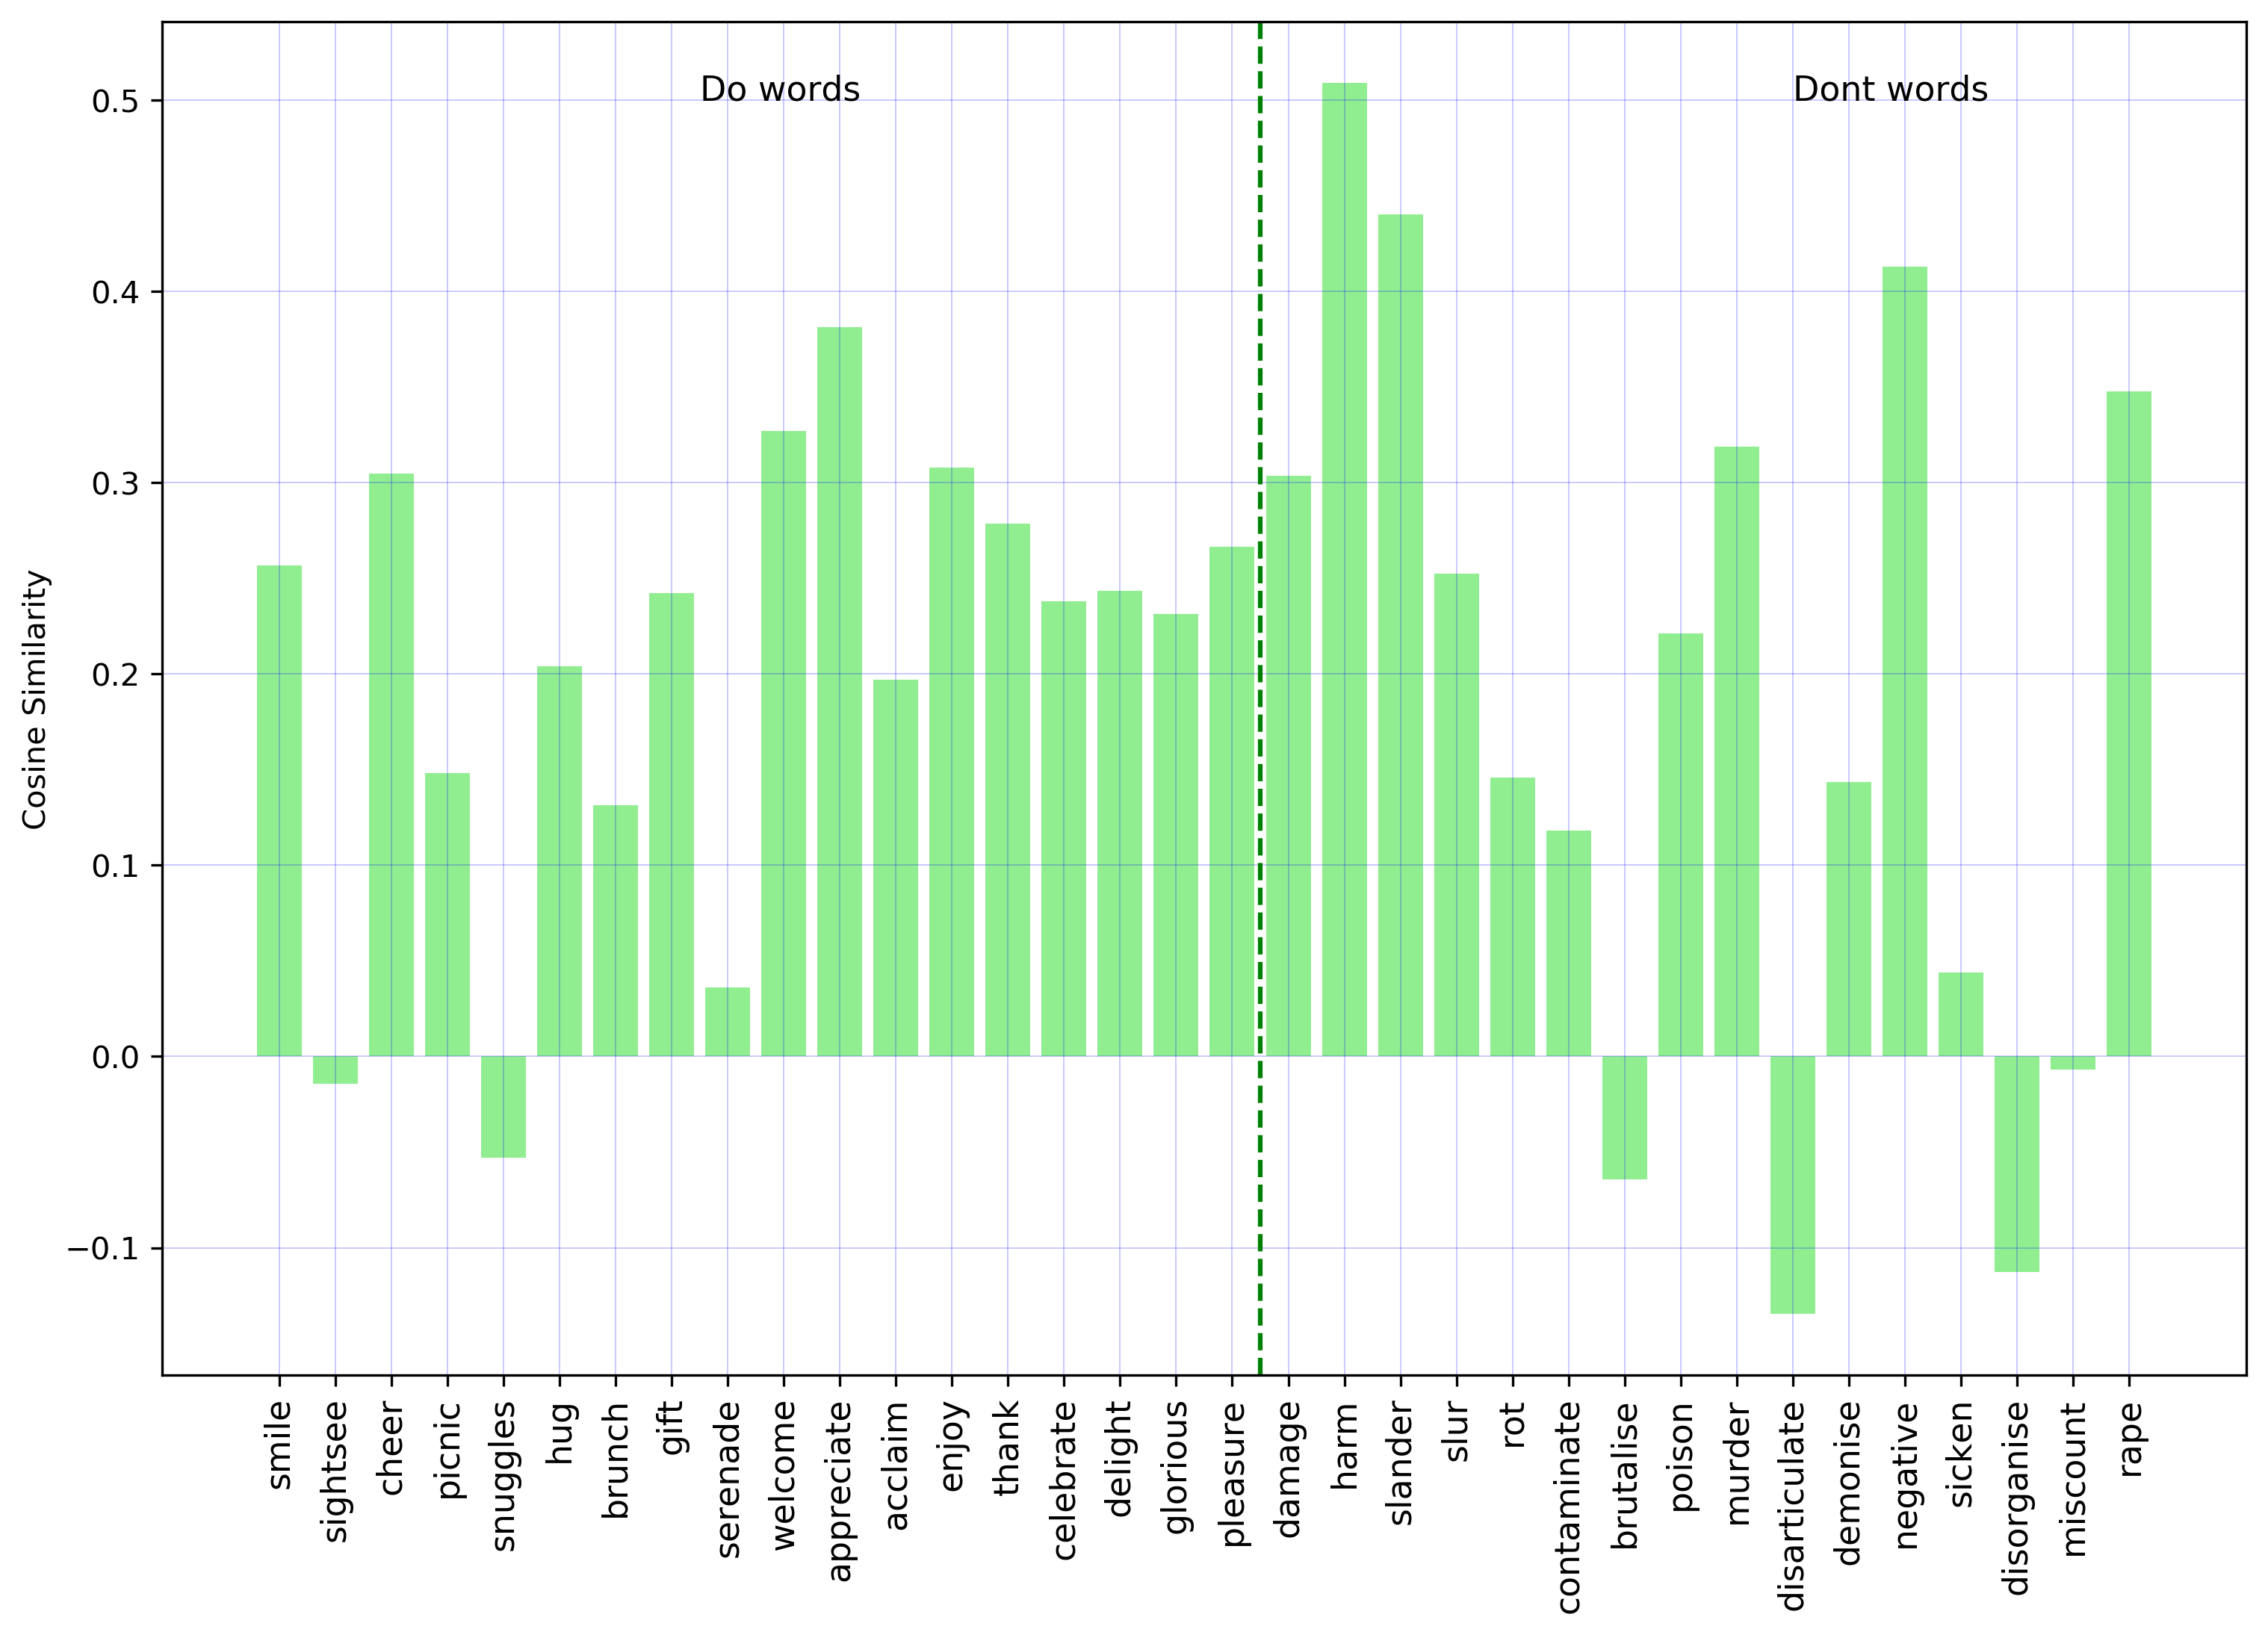

[[1.         0.04708664]
 [0.04708664 1.        ]]


In [15]:
good_verbs = ["smile", "sightsee", "cheer","picnic", "snuggles", "hug", "brunch", "gift", "serenade","welcome",
             "appreciate", "acclaim", "enjoy", "thank", "celebrate", "delight", "glorious", "pleasure"]
bad_verbs = ["damage", "harm", "slander", "slur", "rot", "contaminate", "brutalise", "poison", "murder",
            "disarticulate","demonise","negative","sicken","disorganise","miscount","rape"]

vector_0 = embeddings_dict["fair"] + embeddings_dict["unfair"] 

ss=[]
numsp=[]
plot_index=[]
ind = 0
while ind < 18:
#ind = 0
    good = good_verbs[ind]
    vector2 = embeddings_dict[good]
    cosine_similarity = 1 - spatial.distance.cosine(vector_0, vector2)
    compound=sid.polarity_scores(good)['compound']
    ss.append(compound)     
    ind = ind + 1
    numsp.append(cosine_similarity)
    plot_index.append(good)

    
ind2 = 0
while ind2 < 16:
    bad = bad_verbs[ind2]
    vector2 = embeddings_dict[bad]
    cosine_similarity = 1 - spatial.distance.cosine(vector_0, vector2)
    compound=sid.polarity_scores(bad)['compound']
    ss.append(compound)
    ind2= ind2 + 1
    numsp.append(cosine_similarity)
    plot_index.append(bad)
    

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["savefig.facecolor"] = 'black'


plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.axvline(x=17.5, ls='--', color='green')
plt.ylabel('Cosine Similarity')

#plt.title('Using only the two terms "Fair - Unfair" for the vector')
y_pos = range(len(plot_index))
plt.bar(y_pos, numsp, color='lightgreen')
plt.xticks(y_pos, plot_index, rotation=90, fontsize=11)
plt.text(7.5, 0.5, "Do words",fontsize=11)
plt.text(27, 0.5, "Dont words",fontsize=11)
plt.show()

print(np.corrcoef(ss, numsp))



dos preconcert -0.002949983812868595
dos effuse -0.013544978573918343
dos sparer -0.018587227910757065
dos spellbind -0.02875227853655815
dos care -0.013599828816950321
Mean and Standard Deviation of do words 0.1268595724274443 0.08768144772704832
96
Mean and Standard Deviation of dont words -0.12499514701978667 0.06639291424696586


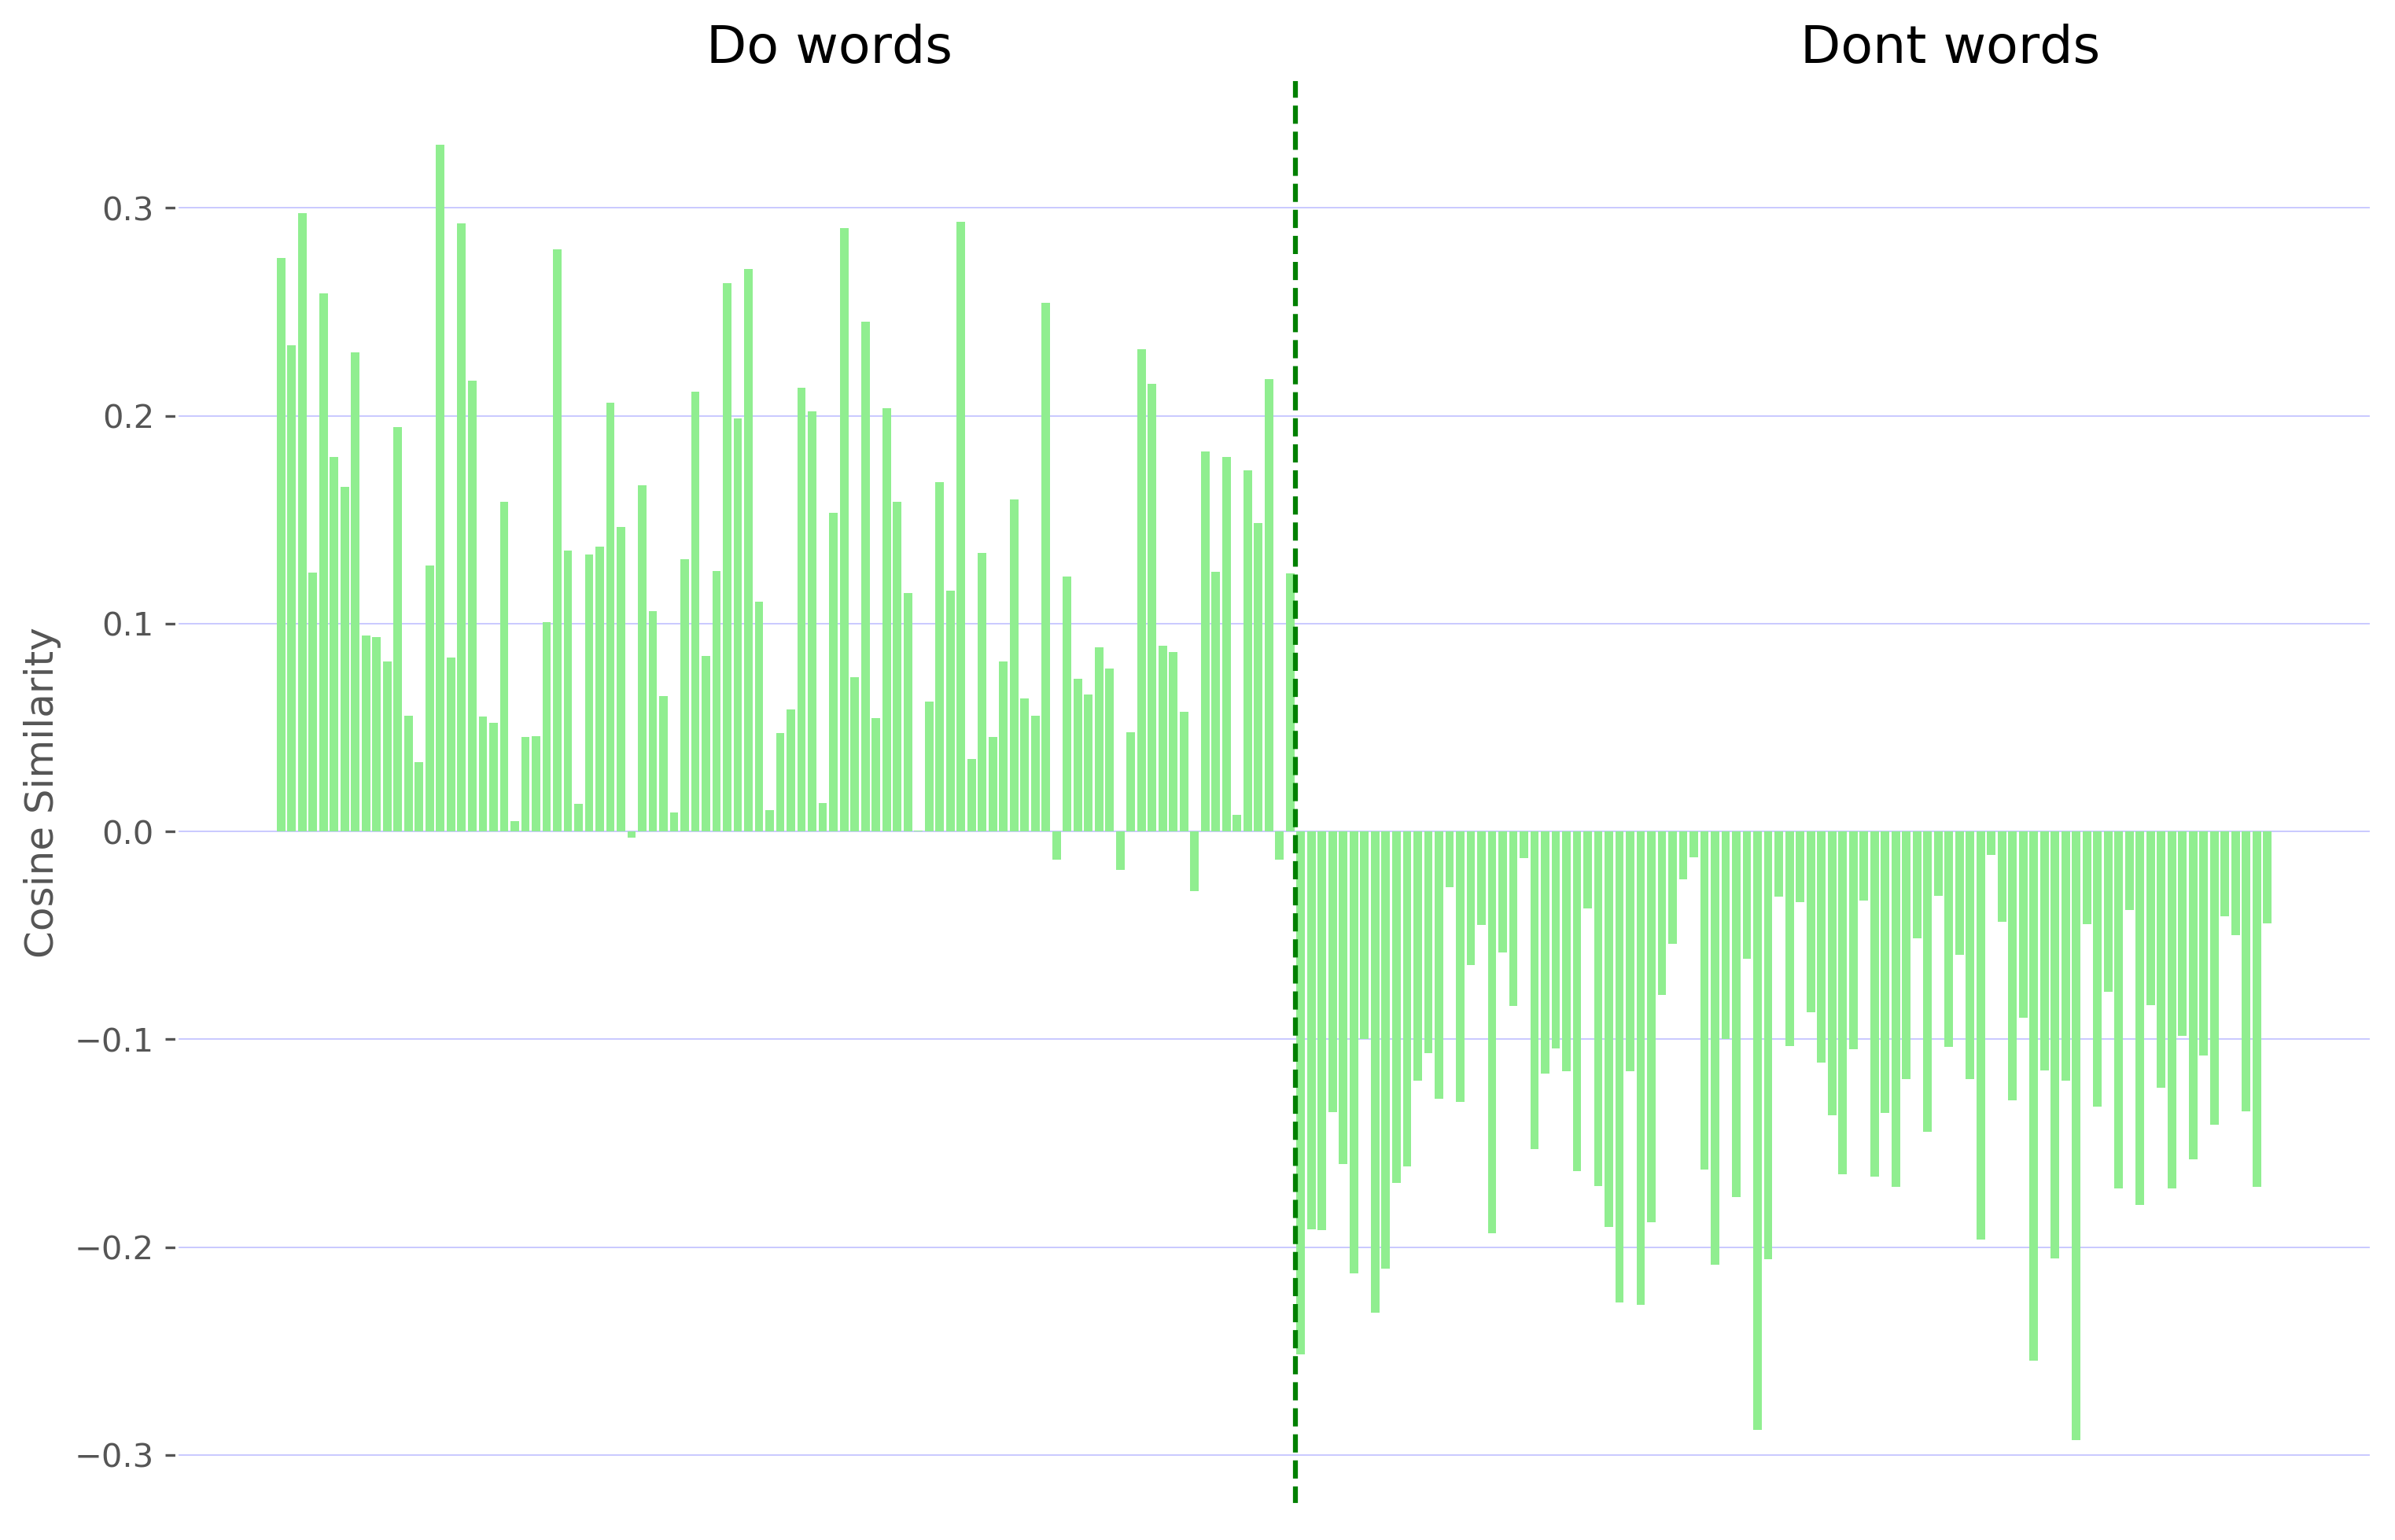

Correlation 
 [[1.         0.70839704]
 [0.70839704 1.        ]]


In [133]:
import statistics
   
filename_do = 'do_words.txt'
filename_dont = 'dont_words.txt'
data_dont_words = np.loadtxt(filename_dont, delimiter='\n', dtype=str)
data_do_words = np.loadtxt(filename_do, delimiter='\n', dtype=str)

vector1b = embeddings_dict["responsibility"] + embeddings_dict["joyous"] + embeddings_dict["beneficial"]  \
+ embeddings_dict["liberty"] - embeddings_dict["prison"] - embeddings_dict["harmful"] - embeddings_dict["pain"]\
- embeddings_dict["irresponsibility"] 



cosine_result=[]
plot_index_y_axis=[]
sentiment=[]
index = 0

word_and_cosine=[]

while index < 96:
    do_words = data_do_words[index]
    vector3b = embeddings_dict[do_words]
    cosine_similarity_score = 1 - spatial.distance.cosine(vector1b, vector3b)
    index = index + 1
    cosine_result.append(cosine_similarity_score)
    plot_index_y_axis.append(do_words)
    compound_score=sid.polarity_scores(do_words)['compound']
    sentiment.append(compound_score)
    
    word_and_cosine.append([do_words,cosine_similarity_score])
    
    
    if cosine_similarity_score < 0:
        print('incorrect do words ', do_words, cosine_similarity_score)

print('Mean and Standard Deviation of do words', statistics.mean(cosine_result), statistics.stdev(cosine_result))
      
print(len(plot_index_y_axis))
      
index = 0
std_cosine=[]
while index < 92:
    dont_words = data_dont_words[index]
    vector3b = embeddings_dict[dont_words]
    cosine_similarity_score = 1 - spatial.distance.cosine(vector1b, vector3b)
    index = index + 1
    cosine_result.append(cosine_similarity_score)
    std_cosine.append(cosine_similarity_score)
    plot_index_y_axis.append(dont_words)
    compound_score=sid.polarity_scores(dont_words)['compound']
    sentiment.append(compound_score)
    
    word_and_cosine.append([dont_words,cosine_similarity_score])
    
    if cosine_similarity_score > 0:
        print('Incorrect dont words: ', dont_words, cosine_similarity_score)
      
    
print('Mean and Standard Deviation of dont words', statistics.mean(std_cosine), statistics.stdev(std_cosine))
      
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["savefig.facecolor"] = 'black'


plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.axvline(x=95.5, ls='--', color='green')

plt.ylabel('Cosine Similarity')

#plt.title('Fairness Vector with 188 Verbs')
y_pos_range = range(len(plot_index_y_axis))
plt.bar(y_pos_range, cosine_result, color='lightgreen')
plt.text(40, 0.37, "Do words", fontsize=16)
plt.text(143, 0.37, "Dont words", fontsize=16)
plt.xticks([])
plt.show()

print('Correlation \n', np.corrcoef(sentiment, cosine_result))




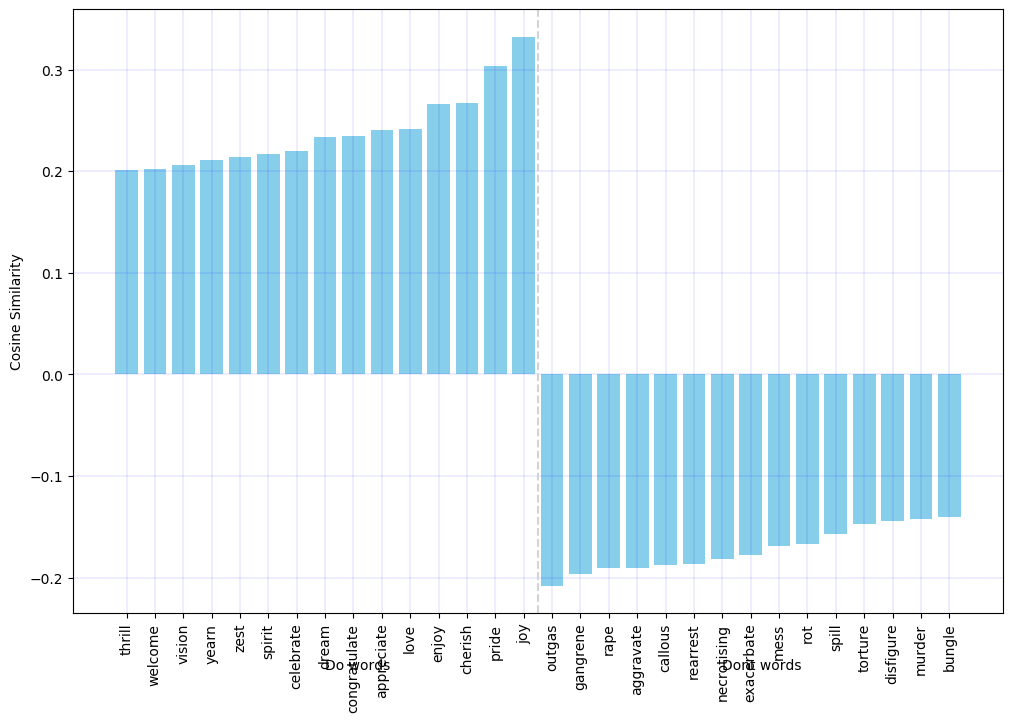

In [17]:
sorted_word_and_cos_list=[]
sorted_word_and_cos_list= (sorted(word_and_cosine,key=lambda x: (x[1])))
top_fifteen = sorted_word_and_cos_list[-15 : ] 
bottom_fifteen = sorted_word_and_cos_list[:15 ] 
top_and_bottom=top_ten+bottom_ten


x, y = zip(*top_and_bottom)

x_index=range(len(x))
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["savefig.facecolor"] = 'black'
plt.grid(color='b', linestyle='-', linewidth=0.1)

plt.axvline(x=14.5, ls='--', color='lightgrey')
plt.xticks(x_index, x, rotation=90)
plt.bar(x_index, y, color='skyblue')
plt.ylabel('Cosine Similarity')
plt.text(7, -0.29, "Do words")
plt.text(21, -0.29, "Dont words")

plt.show()
#print(top_fifteen,bottom_fifteen)

In [18]:
import sys
!{sys.executable} -m pip install tabulate
from tabulate import tabulate    
print(tabulate(top_fifteen))
print(tabulate(bottom_fifteen))


------------  --------
thrill        0.201452
welcome       0.201865
vision        0.206153
yearn         0.211323
zest          0.214129
spirit        0.216599
celebrate     0.220157
dream         0.233292
congratulate  0.234891
appreciate    0.240884
love          0.241294
enjoy         0.266392
cherish       0.266748
pride         0.30319
joy           0.332273
------------  --------
-----------  ---------
outgas       -0.208174
gangrene     -0.196639
rape         -0.190948
aggravate    -0.190727
callous      -0.188017
rearrest     -0.186164
necrotising  -0.181159
exacerbate   -0.177719
mess         -0.168873
rot          -0.1665
spill        -0.157066
torture      -0.146735
disfigure    -0.144616
murder       -0.142771
bungle       -0.140328
-----------  ---------


C:\Users\Green\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


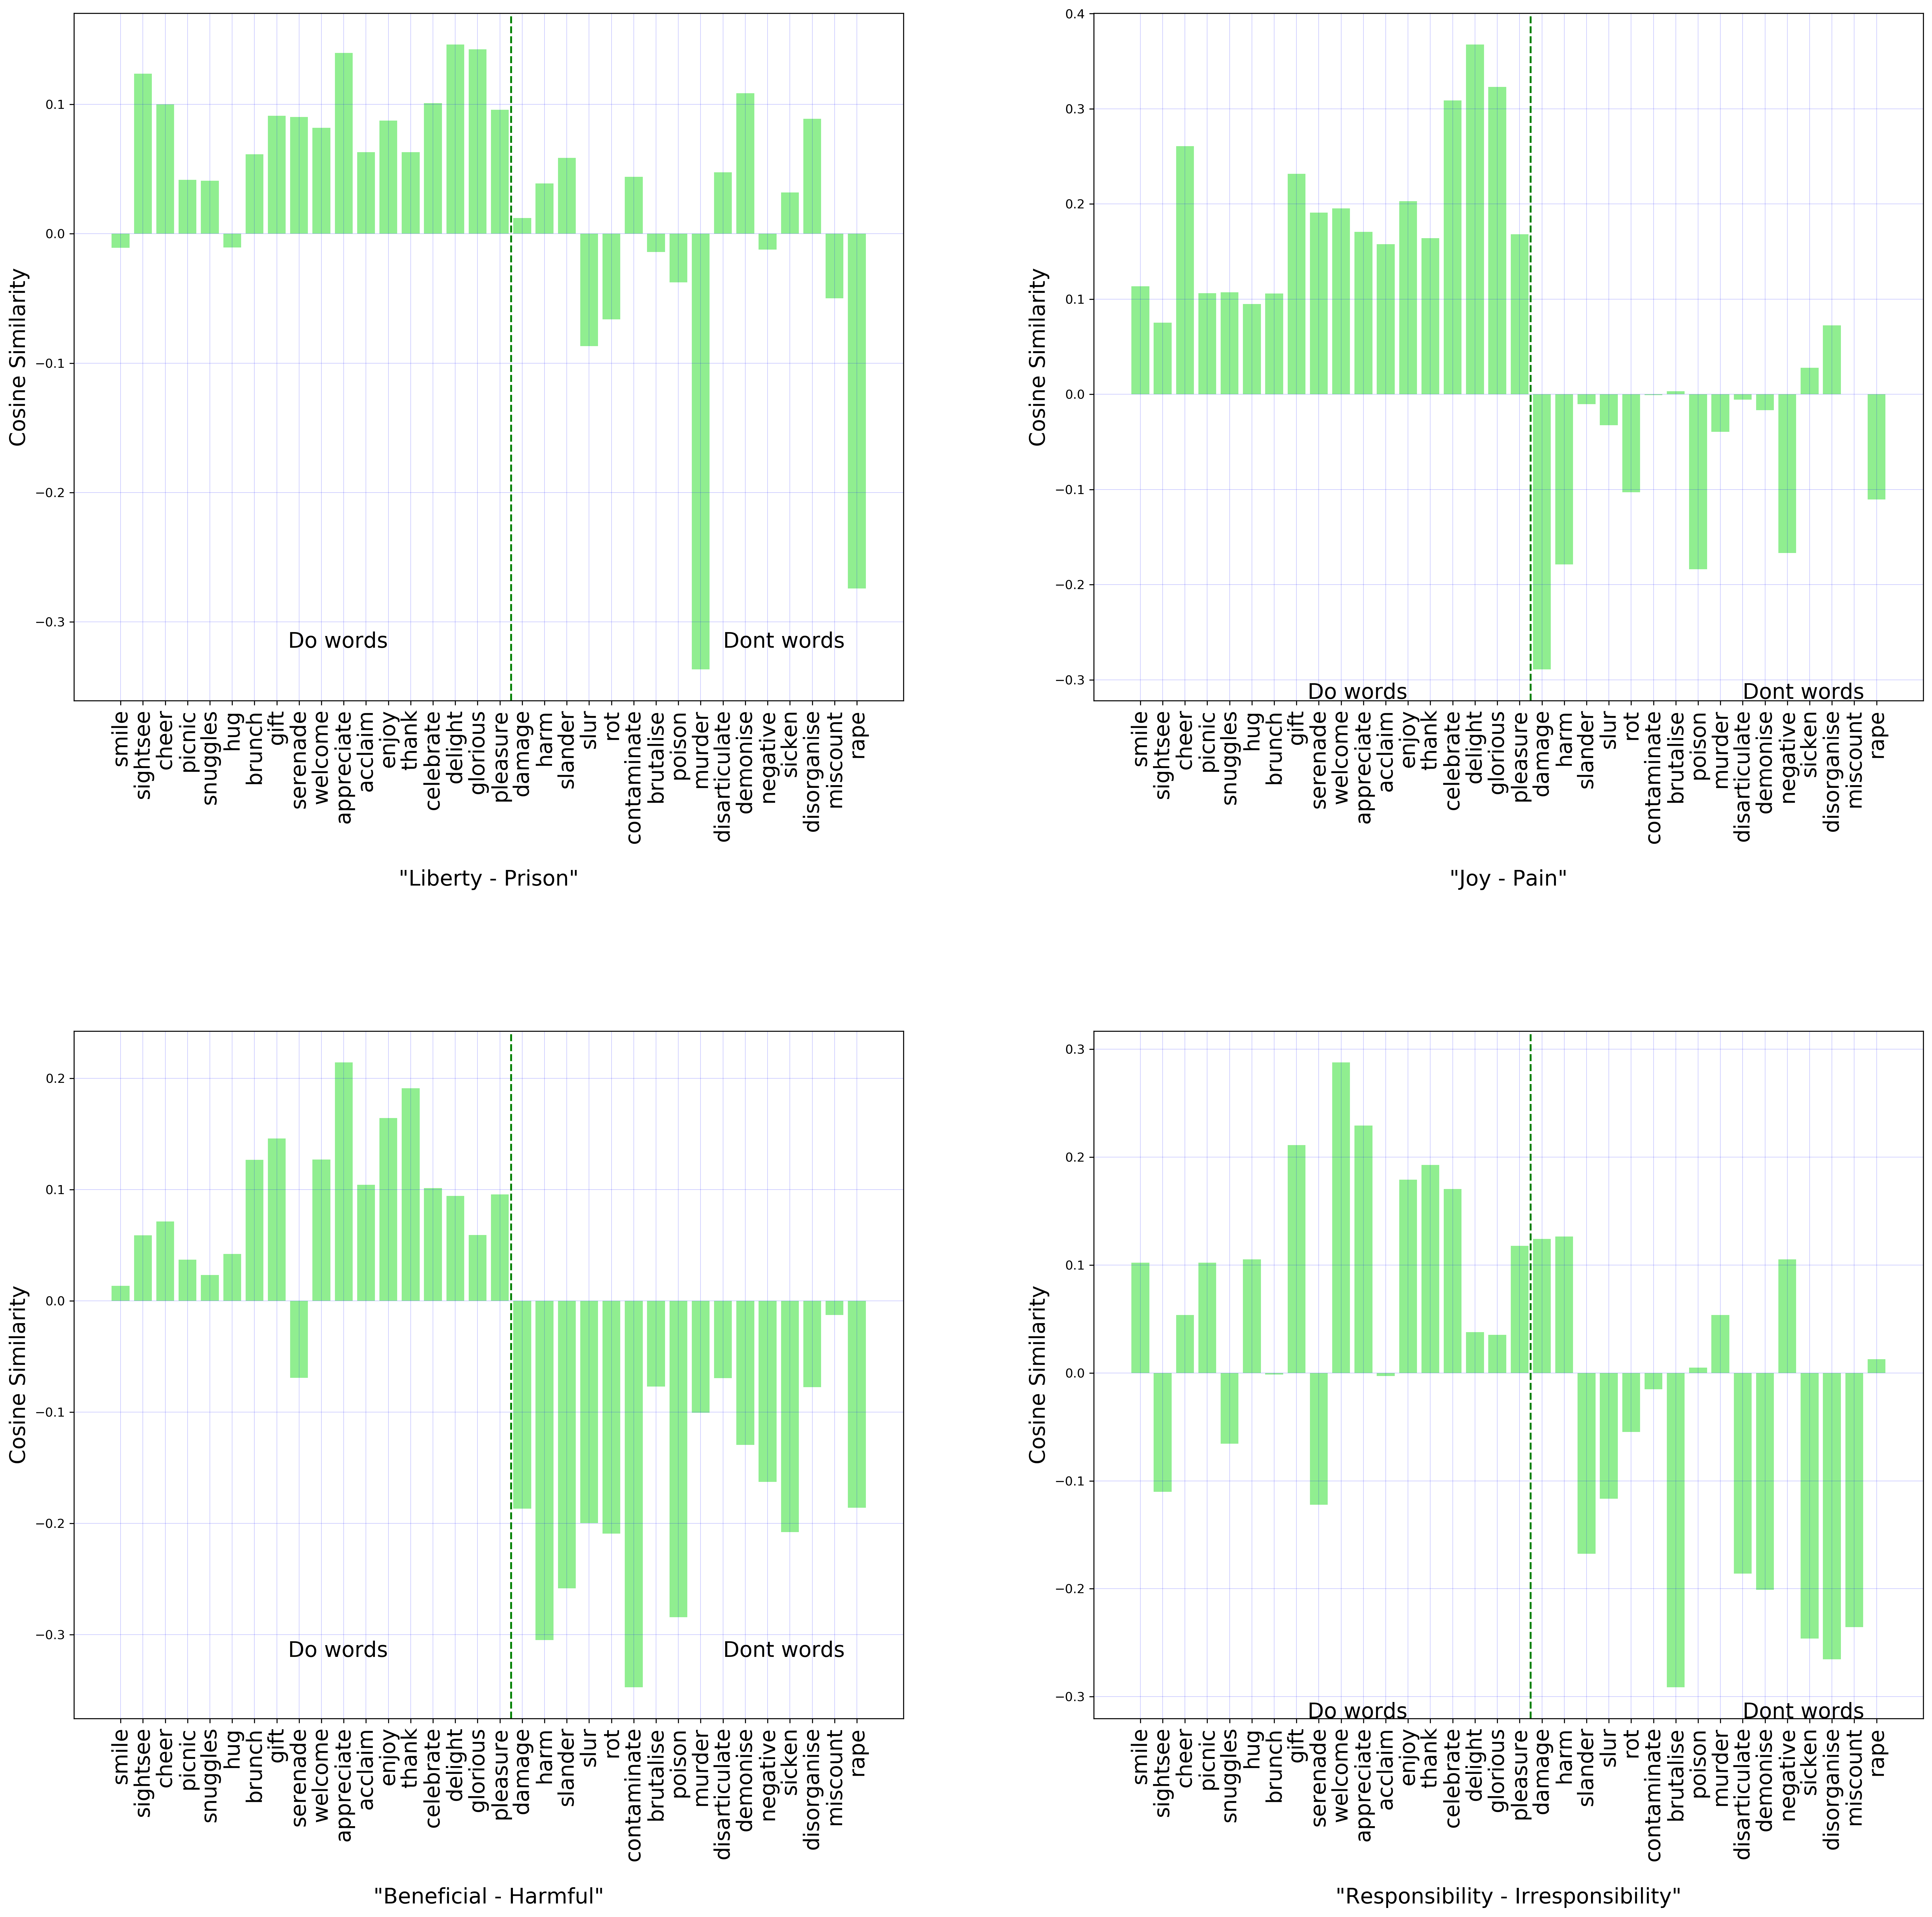

In [20]:
good_verbs = ["smile", "sightsee", "cheer","picnic", "snuggles", "hug", "brunch", "gift", "serenade","welcome",
             "appreciate", "acclaim", "enjoy", "thank", "celebrate", "delight", "glorious", "pleasure"]
bad_verbs = ["damage", "harm", "slander", "slur", "rot", "contaminate", "brutalise", "poison", "murder",
            "disarticulate","demonise","negative","sicken","disorganise","miscount","rape"]


run=0

plt.subplot(2,2,4)

while run < 4:
    if run == 0:
        vector1 = embeddings_dict["liberty"] - embeddings_dict["prison"]
    elif run == 1:
        vector1 = embeddings_dict["joy"] - embeddings_dict["pain"]
    elif run == 2:
        vector1 = embeddings_dict["beneficial"] - embeddings_dict["harmful"] 
    elif run == 3:
        vector1 = embeddings_dict["responsibility"]- embeddings_dict["irresponsibility"] 
    run = run + 1


    nums=[]
    plot_index=[]
    ind = 0
    colour_check=[]
    while ind < 18:
    #ind = 0
        good = good_verbs[ind]
        vector2 = embeddings_dict[good]
        cosine_similarity = 1 - spatial.distance.cosine(vector1, vector2)
    #    print(good, cosine_similarity)
        ind = ind + 1
        nums.append(cosine_similarity)
        plot_index.append(good)

    ind2 = 0
    while ind2 < 16:
    #ind = 0
        bad = bad_verbs[ind2]
        vector2 = embeddings_dict[bad]
        cosine_similarity = 1 - spatial.distance.cosine(vector1, vector2)
    #    print(bad, cosine_similarity)
        ind2= ind2 + 1
        nums.append(cosine_similarity)
        plot_index.append(bad)
        

    plt.rcParams['figure.figsize'] = [24, 24]
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams["figure.facecolor"] = 'white'
    plt.rcParams["axes.facecolor"] = 'white'
    plt.rcParams["savefig.facecolor"] = 'black'
    plt.grid(color='b', linestyle='-', linewidth=0.1)
    plt.axvline(x=17.5, ls='--', color='green')
        
    plt.subplot(2,2,run)
   
    y_pos = range(len(plot_index))
    
    
    plt.bar(y_pos, nums, color='lightgreen')
  
    
    plt.ylabel('Cosine Similarity', color='black', fontsize=17) 
    if run == 1:
        plt.title('"Liberty - Prison"', color='black', y=-0.28, fontsize=17)
    elif run == 2: 
        plt.title('"Joy - Pain"', color='black', y=-0.28, fontsize=17)
    elif run == 3:
        plt.title('"Beneficial - Harmful"', color='black', y=-0.28, fontsize=17)
    elif run == 4:
        plt.title('"Responsibility - Irresponsibility"', color='black', y=-0.28, fontsize=17)
        
    plt.xticks(y_pos, plot_index, rotation=90, fontsize=17)
    plt.text(7.5, -0.32, "Do words",fontsize=17)
    plt.text(27, -0.32, "Dont words",fontsize=17)
plt.tight_layout(pad = 10) 

plt.show()
    
    
    



In [4]:
import numpy as np
from gensim import models
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
embeddings_dict = {}

w = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

C:\Users\Green\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Green\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Incorrect do word:  purl -0.06589345633983612
Incorrect do word:  nuzzle -0.0010032823774963617
Incorrect do word:  friend -0.0013763831229880452
96
incorrect dont_word:  cause 0.08026201277971268
incorrect dont_word:  blame 0.038573410362005234


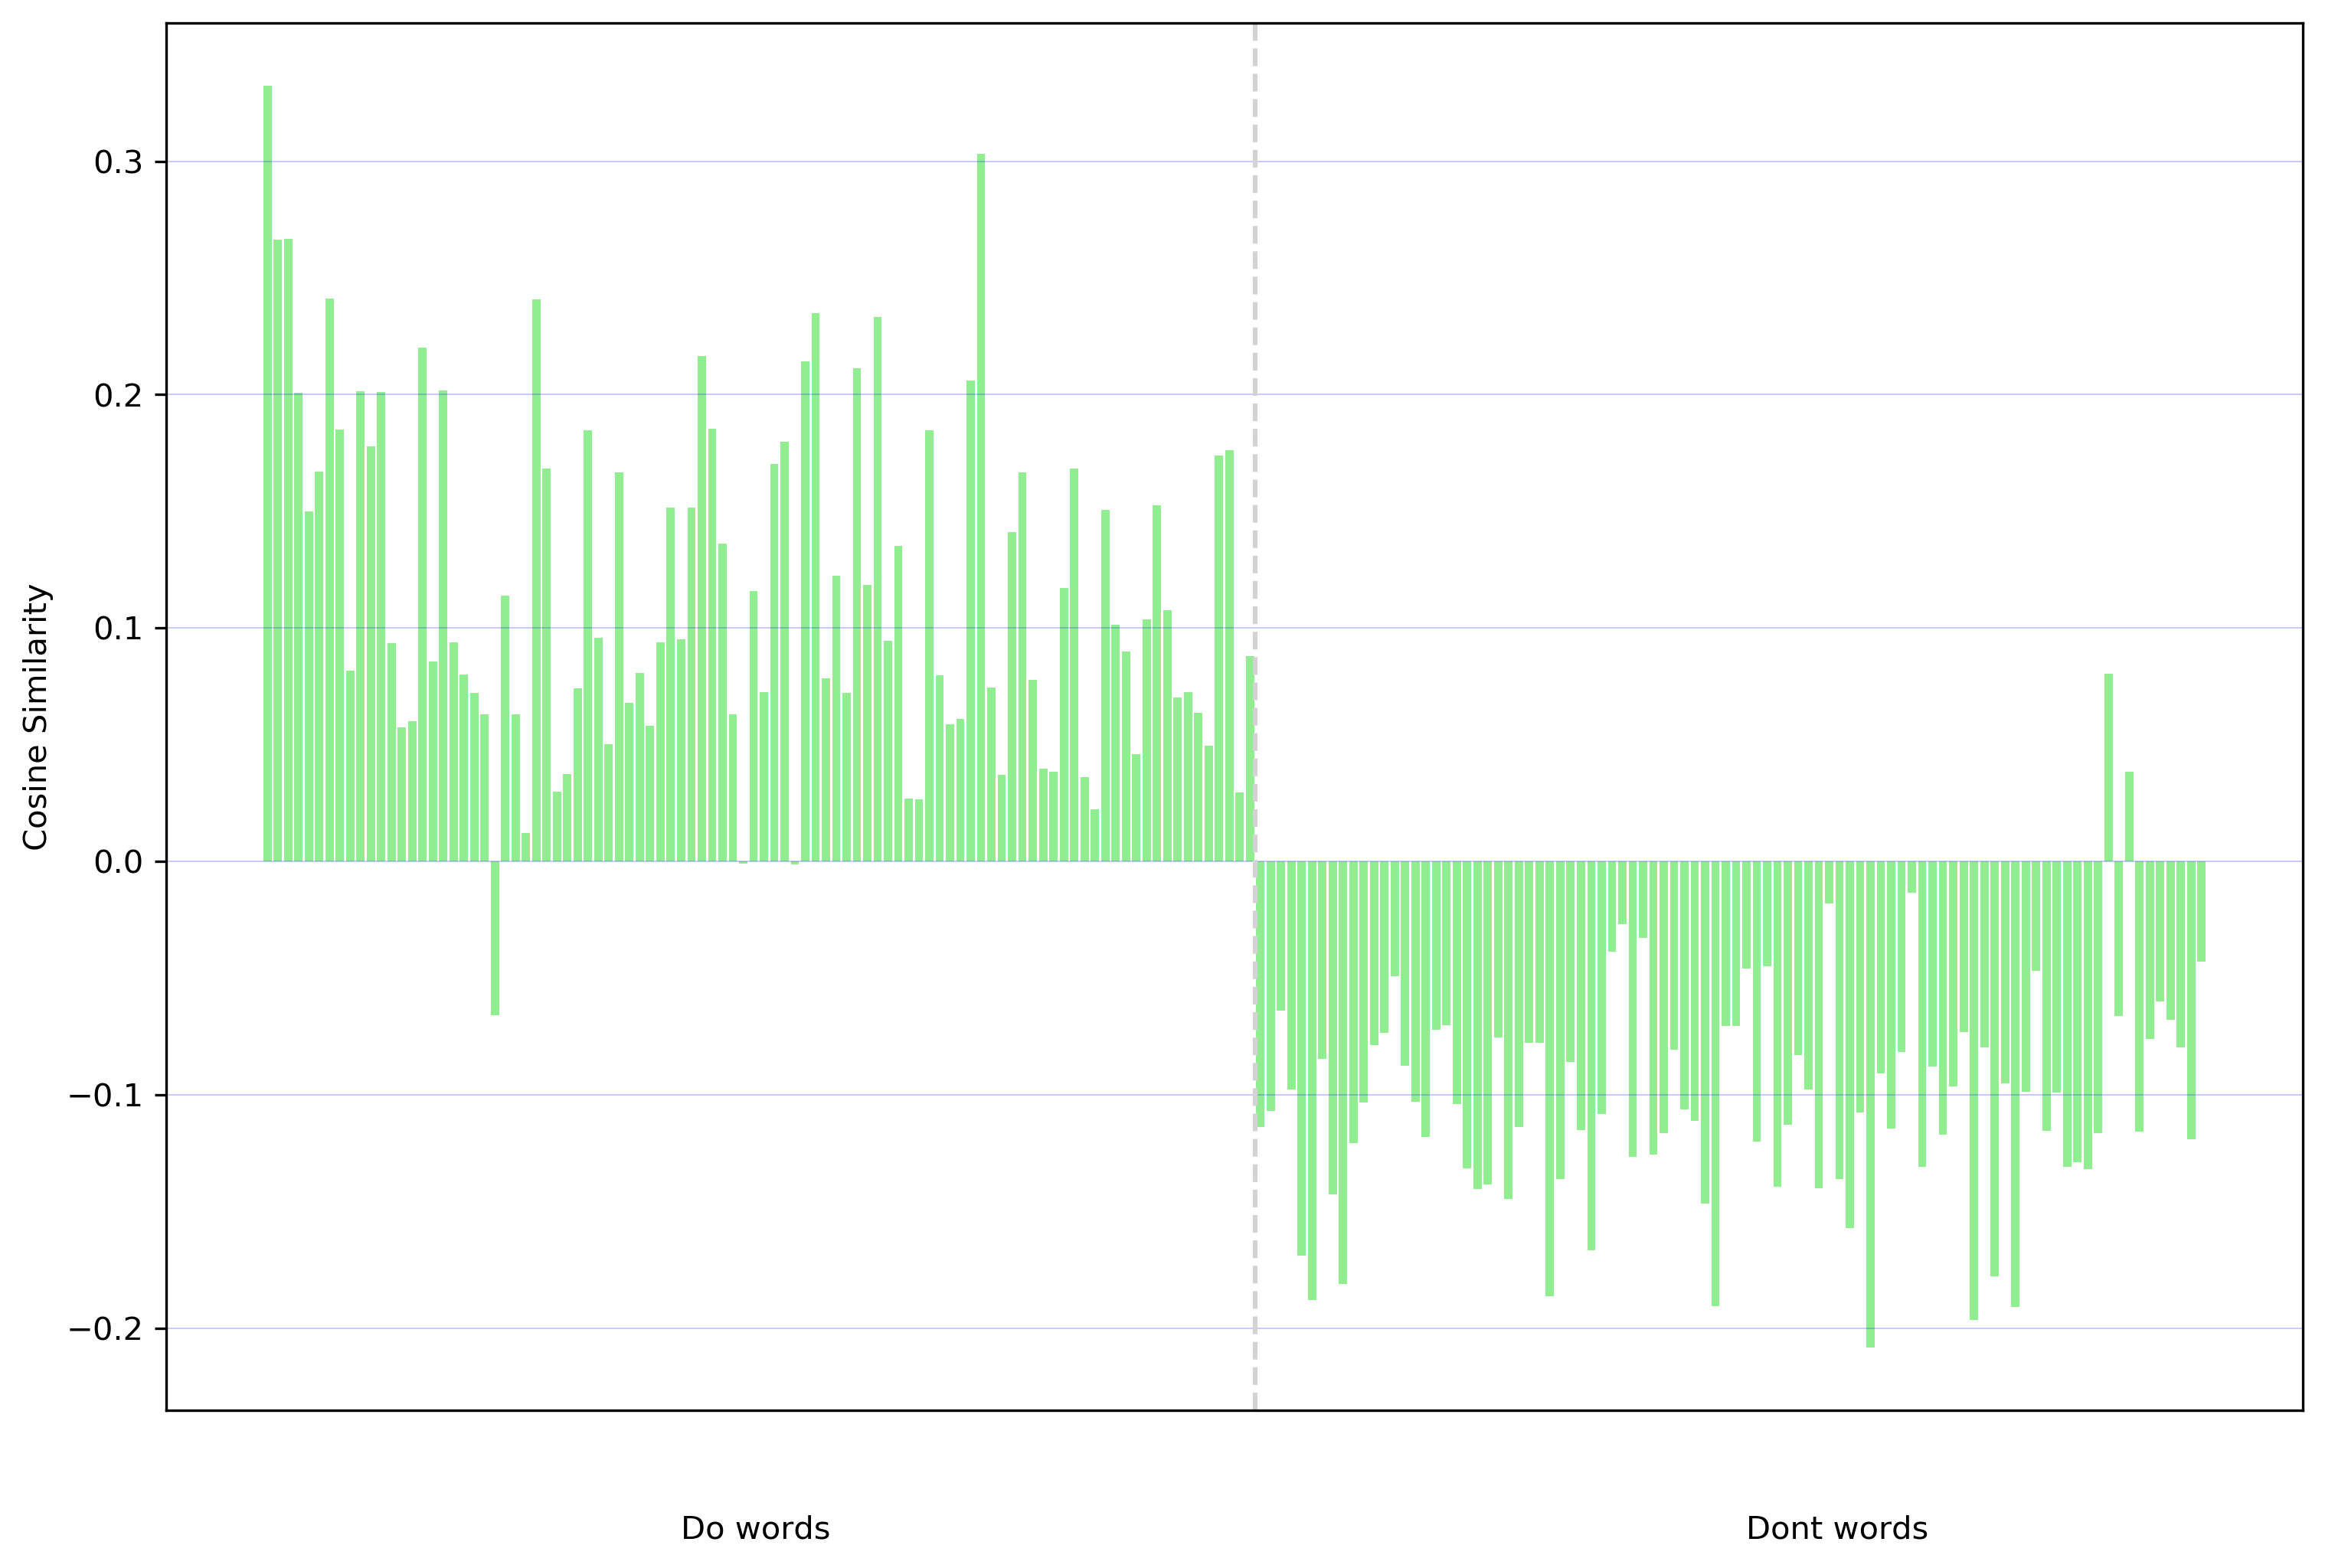

[[1.         0.65859975]
 [0.65859975 1.        ]]


In [21]:
filename_do = 'do_words.txt'
filename_dont = 'dont_words.txt'
data_dont_words = np.loadtxt(filename_dont, delimiter='\n', dtype=str)
data_do_words = np.loadtxt(filename_do, delimiter='\n', dtype=str)


vector1=w["responsibility"] +w["joy"] + w["gaining"] +w["beneficial"] + w["liberty"] - w["prison"] -w["harmful"] - w["pain"] - w["irresponsibility"] 

cosine_result=[]
plot_index_y_axis=[]
sentiment=[]
index = 0

word_and_cosine=[]

while index < 96:
#ind = 0
    do_words = data_do_words[index]
    vector3b = w[do_words]
    cosine_similarity_score = 1 - spatial.distance.cosine(vector1, vector3b)

    index = index + 1
    cosine_result.append(cosine_similarity_score)
    plot_index_y_axis.append(do_words)
    compound_score=sid.polarity_scores(do_words)['compound']
    sentiment.append(compound_score)
    
    word_and_cosine.append([do_words,cosine_similarity_score])
    
    
    if cosine_similarity_score < 0:
        print('Incorrect do word: ', do_words, cosine_similarity_score)
        
print(len(plot_index_y_axis))
index = 0
while index < 92:
#ind = 0
    dont_words = data_dont_words[index]
    vector3b = w[dont_words]
    cosine_similarity_score = 1 - spatial.distance.cosine(vector1, vector3b)

    index = index + 1
    cosine_result.append(cosine_similarity_score)
    plot_index_y_axis.append(dont_words)
    compound_score=sid.polarity_scores(dont_words)['compound']
    sentiment.append(compound_score)
    
    word_and_cosine.append([dont_words,cosine_similarity_score])

    if cosine_similarity_score > 0:
        print('incorrect dont_word: ',dont_words, cosine_similarity_score)
        
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["savefig.facecolor"] = 'black'


plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.axvline(x=95.5, ls='--', color='lightgrey')

plt.ylabel('Cosine Similarity')
#plt.title('Fairness Vector with 188 Verbs')
y_pos_range = range(len(plot_index_y_axis))
plt.bar(y_pos_range, cosine_result, color='lightgreen')
#plt.xticks(y_pos_range, plot_index_y_axis, rotation=90)
plt.text(40, -0.29, "Do words")
plt.text(143, -0.29, "Dont words")
plt.xticks([])
plt.show()

sorted_word_and_cos_list=[]
sorted_word_and_cos_list= (sorted(word_and_cosine,key=lambda x: (x[1])))
top_ten = sorted_word_and_cos_list[-15 : ] 
bottom_ten = sorted_word_and_cos_list[:15 ] 
top_and_bottom=top_ten+bottom_ten
x, y = zip(*top_and_bottom)

print(np.corrcoef(cosine_result, sentiment))



In [2]:
FairVec = embeddings_dict["responsibility"] + embeddings_dict["joy"] + embeddings_dict["beneficial"]  \
+ embeddings_dict["liberty"] - embeddings_dict["prison"] - embeddings_dict["harmful"] - embeddings_dict["pain"]\
- embeddings_dict["irresponsibility"]  


#Change in verb

vector_boy_kick_baby= embeddings_dict["boy"] + embeddings_dict["kick"] + embeddings_dict["baby"] 
vector_boy_help_baby= embeddings_dict["boy"] + embeddings_dict["help"] + embeddings_dict["baby"] 

#Change in context

vector_boy_kick_baby_toy= embeddings_dict["boy"] + embeddings_dict["kick"] + embeddings_dict["baby"] + embeddings_dict["toy"]  
vector_boy_kick_baby_head= embeddings_dict["boy"] + embeddings_dict["kick"] + embeddings_dict["baby"] + embeddings_dict["head"] 

#Change in description

vector_boy_kick_baby_toy_ball= embeddings_dict["boy"] + embeddings_dict["kick"] + embeddings_dict["baby"] + embeddings_dict["toy"]  + embeddings_dict["ball"]   
vector_boy_kick_baby_head_side= embeddings_dict["boy"] + embeddings_dict["kick"] + embeddings_dict["baby"] + embeddings_dict["head"] + embeddings_dict["side"] 

#Change in adjective 

vector_boy_kick_baby_happily= embeddings_dict["boy"] + embeddings_dict["kick"] + embeddings_dict["baby"] + embeddings_dict["happily"]
vector_boy_kick_head_happily= embeddings_dict["boy"] + embeddings_dict["help"] + embeddings_dict["baby"] + embeddings_dict["happily"]

#Change in inferred intenion 

vector_i_intention_a= embeddings_dict["boy"] + embeddings_dict["kick"] + embeddings_dict["baby"] + embeddings_dict["away"] + embeddings_dict["from"] + embeddings_dict["himself"]
vector_i_intention_b= embeddings_dict["boy"] + embeddings_dict["kick"] + embeddings_dict["baby"] + embeddings_dict["away"] + embeddings_dict["from"] + embeddings_dict["fire"]

#Change in stated intention 
vector_s_intention_a= embeddings_dict["boy"] + embeddings_dict["kick"] + embeddings_dict["baby"] + embeddings_dict["offence"] 
vector_s_intention_b= embeddings_dict["boy"] + embeddings_dict["kick"] + embeddings_dict["baby"] + embeddings_dict["defence"] 

#Change in agent

vector_footballer_kick_baby= embeddings_dict["footballer"] + embeddings_dict["kick"] + embeddings_dict["baby"] 
vector_footballer_help_baby= embeddings_dict["footballer"] + embeddings_dict["help"] + embeddings_dict["baby"] 

#Change in agent and patient 

vector_footballer_kick_footballer= embeddings_dict["footballer"] + embeddings_dict["kick"] + embeddings_dict["footballer"] 
vector_footballer_help_footballer= embeddings_dict["footballer"] + embeddings_dict["help"] + embeddings_dict["footballer"] 

#Change in Agent related object 
vector_footballer_kick_baby_ball= embeddings_dict["footballer"] + embeddings_dict["kick"] + embeddings_dict["baby"] + embeddings_dict["ball"]  
vector_footballer_kick_baby_head= embeddings_dict["footballer"] + embeddings_dict["kick"] + embeddings_dict["baby"] + embeddings_dict["head"] 

#Cosine Similarity Calculation

testVectorList=[vector_boy_kick_baby, vector_boy_help_baby, vector_boy_kick_baby_toy, vector_boy_kick_baby_head, vector_boy_kick_baby_toy_ball, \
vector_boy_kick_baby_head_side, vector_boy_kick_baby_happily, vector_boy_kick_head_happily, vector_i_intention_a, \
vector_i_intention_b, vector_s_intention_a, vector_s_intention_b, vector_footballer_help_baby, vector_footballer_kick_baby,\
vector_footballer_kick_footballer, vector_footballer_help_footballer, vector_footballer_kick_baby_ball, vector_footballer_kick_baby_head]


def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

tableList=[]
from tabulate import tabulate
for test_Vector in testVectorList:
    cosine_similarity = 1 - spatial.distance.cosine(FairVec, test_Vector)
    VecName=namestr(test_Vector, globals())
    tableList.append((VecName[0],cosine_similarity))
    
print(tabulate(tableList))


---------------------------------  -----------
vector_boy_kick_baby               -0.00565162
vector_boy_help_baby                0.0471718
vector_boy_kick_baby_toy            0.0219337
vector_boy_kick_baby_head          -0.0137369
vector_boy_kick_baby_toy_ball       0.032666
vector_boy_kick_baby_head_side     -0.0261319
vector_boy_kick_baby_happily        0.0537424
vector_boy_kick_head_happily        0.0976599
vector_i_intention_a               -0.00721076
vector_i_intention_b               -0.00948279
vector_s_intention_a               -0.033214
vector_s_intention_b                0.0221658
vector_footballer_help_baby         0.0424711
vector_footballer_kick_baby        -0.0168214
vector_footballer_kick_footballer  -0.0500929
vector_footballer_help_footballer  -0.00402755
vector_footballer_kick_baby_ball    0.00615412
vector_footballer_kick_baby_head   -0.0236741
---------------------------------  -----------
